In [163]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

from sklearn.model_selection import RandomizedSearchCV
%matplotlib inline

In [164]:
df= pd.read_excel('../data/dataset_1053.xlsx')
df.drop(columns=['A2BBX6', 'A', 'B1', 'B2', 'X'], inplace=True)

In [165]:
selected_features = [
    'B1_electronegativity', 'B2_electronegativity',
    'A_atomic_mass', 'B1_atomic_mass',
    'X_electron_affinity',
    'B2_atomic_number',
    'B1_first_ionization_energy', 'B2_first_ionization_energy', 'X_first_ionization_energy',
    'A_second_ionization_energy', 'B1_second_ionization_energy',
    'B1_melting_point', 'B2_melting_point',
    'B1_boiling_point',
    'B1_third_ionization_energy', 'B2_third_ionization_energy'
]

X_selected = df[selected_features]
y = df['band_gap']

In [166]:
X_selected.shape

(1053, 16)

In [167]:
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.15, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.15, random_state=42
)
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)   # fit + transform
X_val   = scaler.transform(X_val)         # transform only
X_test  = scaler.transform(X_test)        # transform only

In [168]:
### Verify Scaling
pd.DataFrame(X_train, columns=selected_features).describe()

,B1_electronegativity,B2_electronegativity,A_atomic_mass,B1_atomic_mass,X_electron_affinity,B2_atomic_number,B1_first_ionization_energy,B2_first_ionization_energy,X_first_ionization_energy,A_second_ionization_energy,B1_second_ionization_energy,B1_melting_point,B2_melting_point,B1_boiling_point,B1_third_ionization_energy,B2_third_ionization_energy
count,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000
mean,0.358209,0.320733,0.513667,0.372294,0.212398,0.498207,0.396274,0.247587,0.515829,0.087732,0.168681,0.326976,0.508627,0.419677,0.148917,0.095205
std,0.223810,0.170809,0.200366,0.269872,0.394440,0.266489,0.196481,0.142286,0.185163,0.159666,0.247111,0.228916,0.279262,0.230349,0.191729,0.138635
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.168478,0.179283,0.399323,0.172641,0.000000,0.263736,0.236666,0.127160,0.461296,0.000000,0.033361,0.089601,0.241380,0.213911,0.041416,0.043221
50%,0.369565,0.338645,0.623465,0.264837,0.000000,0.450549,0.389409,0.256592,0.461296,0.015638,0.085665,0.324633,0.483270,0.443510,0.082965,0.059032
75%,0.548913,0.490040,0.645349,0.611759,0.000000,0.769231,0.548810,0.321378,0.461296,0.156751,0.126742,0.455598,0.740399,0.562791,0.131115,0.085168
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [169]:
model = XGBRegressor(
    n_estimators = 30,
    learning_rate = 0.1,
    gamma = 0,
    max_depth = 6,    
    subsample = 1,   
    colsample_bytree=0.6,
    reg_alpha = 0,
    reg_lambda = 1,
     
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1,
)

model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=30,
             n_jobs=-1, num_parallel_tree=None, ...)

In [170]:
{'subsample': 0.8, 'reg_lambda': 0, 'reg_alpha': 0, 'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.8}

{'subsample': 0.8,
 'reg_lambda': 0,
 'reg_alpha': 0,
 'n_estimators': 100,
 'max_depth': 6,
 'learning_rate': 0.1,
 'gamma': 0.1,
 'colsample_bytree': 0.8}

[0]	validation_0-rmse:1.65322	validation_1-rmse:1.63712
[50]	validation_0-rmse:0.18424	validation_1-rmse:0.73935
[70]	validation_0-rmse:0.18424	validation_1-rmse:0.73936


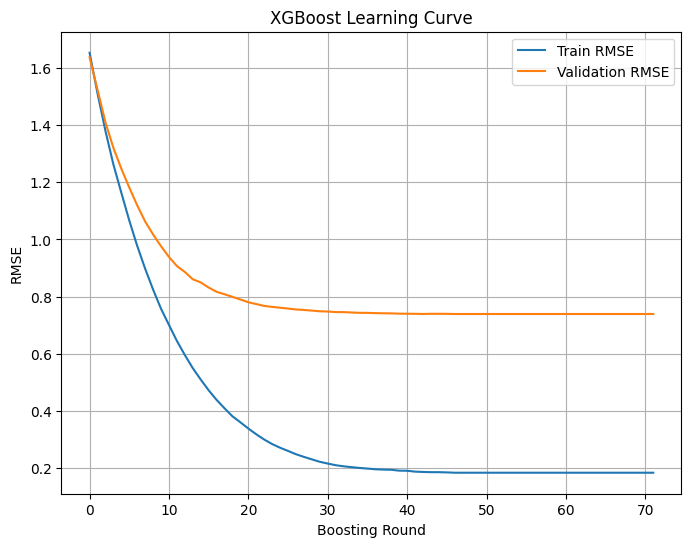

In [180]:
import xgboost as xgb
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# Early stopping only on validation set
early_stop = xgb.callback.EarlyStopping(
    rounds=25, 
    metric_name='rmse', 
    data_name='validation_1',  # validation_1 corresponds to the second dataset in eval_set
    save_best=True
)

# Define model
model = XGBRegressor(
    objective='reg:squarederror',
    learning_rate=0.1,
    max_depth=60,
    gamma = 0.1,#0,
    n_estimators=500,#300,
    subsample=1.0,
    colsample_bytree=0.8,
    reg_alpha=0,
    reg_lambda=1,
    random_state=21,
    callbacks=[early_stop]
)

# Fit model
model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],  # training first, validation second
    verbose=50
)

# Extract RMSE curves
results = model.evals_result()
train_rmse = results['validation_0']['rmse']  # training
val_rmse   = results['validation_1']['rmse']  # validation

# Plot learning curves
plt.figure(figsize=(8,6))
plt.plot(train_rmse, label='Train RMSE')
plt.plot(val_rmse, label='Validation RMSE')
plt.xlabel('Boosting Round')
plt.ylabel('RMSE')
plt.title('XGBoost Learning Curve')
plt.legend()
plt.grid(True)
plt.show()


In [172]:
eval(model, X_train, y_train, "Train")
eval(model, X_val, y_val, "Validation")
eval(model, X_test, y_test, "Test")

Train: MAE = 0.311, RMSE = 0.165, R^2 = 0.949
Validation: MAE = 0.530, RMSE = 0.551, R^2 = 0.824
Test: MAE = 0.508, RMSE = 0.586, R^2 = 0.846


In [173]:
def eval(model, X, Y, name):
    predictions = model.predict(X)
    mae = mean_absolute_error(Y, predictions)
    rmse = mean_squared_error(Y, predictions)
    r2 = r2_score(Y, predictions)
    
    print(f'{name}: MAE = {mae:0.3f}, RMSE = {rmse:.3f}, R^2 = {r2:.3f}')

eval(model, X_train, y_train, "Train")
eval(model, X_val, y_val, "Validation")
eval(model, X_test, y_test, "Test")

Train: MAE = 0.311, RMSE = 0.165, R^2 = 0.949
Validation: MAE = 0.530, RMSE = 0.551, R^2 = 0.824
Test: MAE = 0.508, RMSE = 0.586, R^2 = 0.846


In [174]:
def plot_cor(Y_train, Y_train_pred, Y_val,   Y_val_pred, Y_test,  Y_test_pred):

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    datasets = [
        ("Training Set",     Y_train, Y_train_pred),
        ("Validation Set",   Y_val,   Y_val_pred),
        ("Test Set",         Y_test,  Y_test_pred),
    ]

    for ax, (title, Y_true, Y_pred) in zip(axes, datasets):

        ax.scatter(Y_true, Y_pred, alpha=0.6, s=20)

        # best fit 1:1 line
        min_val = min(Y_true.min(), Y_pred.min())
        max_val = max(Y_true.max(), Y_pred.max())
        ax.plot([min_val, max_val], [min_val, max_val], 'k--', linewidth=1)

        ax.set_xlabel("Given bandgap (eV)")
        ax.set_ylabel("Predicted bandgap (eV)")
        ax.set_title(title)

    plt.tight_layout()
    plt.show()

/var/folders/v_/7wh4xmnn02qbm4wqq_37tpsw0000gn/T/ipykernel_89719/1068308281.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k', color='red', label='Perfect prediction')


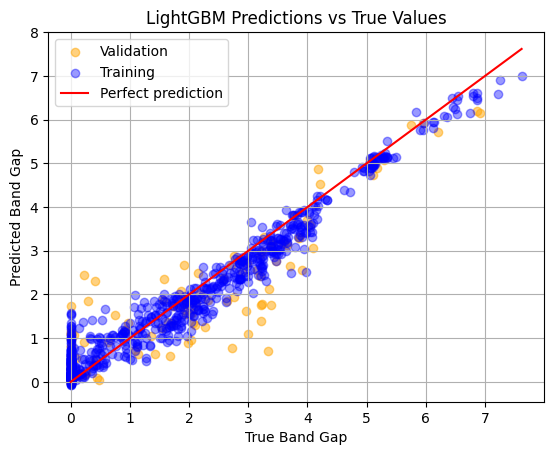

In [175]:
Y_train_pred = model.predict(X_train)
Y_val_pred   = model.predict(X_val)
Y_test_pred  = model.predict(X_test)

# plot_cor(y_train, Y_train_pred,y_val,   Y_val_pred, y_test,  Y_test_pred)

# Validation set
plt.scatter(y_val, Y_val_pred, label='Validation', alpha=0.5, color='orange')

# Training set
plt.scatter(y_train, Y_train_pred, label='Training', alpha=0.4, color='blue')
# plt.scatter(y_test, Y_test_pred, label='Test', alpha=0.4, color='green')

# 45-degree reference line
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k', color='red', label='Perfect prediction')

plt.xlabel("True Band Gap")
plt.ylabel("Predicted Band Gap")
plt.title("LightGBM Predictions vs True Values")
plt.legend()
plt.grid(True)
plt.show()

In [176]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# ----------------------------
# Model
# ----------------------------
model = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)

# ----------------------------
# Hyperparameter distribution
# ----------------------------
param_dist = {
    'n_estimators': [100, 300, 500, 1000],
    'max_depth': [3, 5, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.5, 1],
    'gamma': [0, 0.1, 0.5]
}

# ----------------------------
# Fit parameters for early stopping
# ----------------------------
fit_params = {
    'eval_set': [(X_train, y_train), (X_val, y_val)],
}

# ----------------------------
# RandomizedSearchCV
# ----------------------------
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=50,
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Pass early stopping via fit_params
random_search.fit(X_train, y_train, **fit_params)

# ----------------------------
# Best model & evaluation
# ----------------------------
best_model = random_search.best_estimator_
print("Best hyperparameters:", random_search.best_params_)

y_val_pred = best_model.predict(X_val)
rmse_val = mean_squared_error(y_val, y_val_pred)
print(f"Validation RMSE: {rmse_val:.4f}")

# ----------------------------
# Optional: learning curve
# ----------------------------
results = best_model.evals_result()
train_rmse = results['validation_0']['rmse']
val_rmse   = results['validation_1']['rmse']

plt.figure(figsize=(8,6))
plt.plot(train_rmse, label='Train RMSE')
plt.plot(val_rmse, label='Validation RMSE')
plt.xlabel('Boosting Round')
plt.ylabel('RMSE')
plt.title('XGBoost Learning Curve')
plt.legend()
plt.grid(True)
plt.show()



Fitting 3 folds for each of 50 candidates, totalling 150 fits
[0]	validation_0-rmse:1.73955	validation_1-rmse:1.71484
[0]	validation_0-rmse:1.73555	validation_1-rmse:1.70830
[1]	validation_0-rmse:1.67207	validation_1-rmse:1.65319
[2]	validation_0-rmse:1.61116	validation_1-rmse:1.59519
[3]	validation_0-rmse:1.55565	validation_1-rmse:1.54704
[4]	validation_0-rmse:1.50552	validation_1-rmse:1.50186
[5]	validation_0-rmse:1.45508	validation_1-rmse:1.45765
[6]	validation_0-rmse:1.40325	validation_1-rmse:1.41075
[7]	validation_0-rmse:1.35757	validation_1-rmse:1.37448
[8]	validation_0-rmse:1.31385	validation_1-rmse:1.33602
[9]	validation_0-rmse:1.27297	validation_1-rmse:1.30060
[10]	validation_0-rmse:1.23437	validation_1-rmse:1.26528
[11]	validation_0-rmse:1.19793	validation_1-rmse:1.23644
[12]	validation_0-rmse:1.16314	validation_1-rmse:1.20493


KeyboardInterrupt: 